<a href="https://colab.research.google.com/github/EnzoGolfetti/imersaoalura_dados_3/blob/main/aula03_imersao_alura_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Drugs Discovery - Imersão Dados Alura
Desafio 1: Investigar por que a classe tratamento é tão desbalanceada

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip') #compression = 'zip' serve par aarquivos que estejam comprimidos, isso é bom para arquivos muito grandes
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

Cada linha é um experimento de cultura de células que foi submetida a alguma droga com determinada dosagem e por determinada quantidade de tempo.

In [ ]:
dados.info() #para ver as primeiras infos dos dados, número de index (linhas)
#colunas
# e tipo dos dados, no caso são 872 de float64, 1 de int64 e 4 object (string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [ ]:
dados.isnull().sum() #o .isnull .summ serve para somar por coluna os valores nulos, da um parecer inicial sobre quais colunas tem nulos e dar uma ideia
#do que vamos precisar fazer

id            0
tratamento    0
tempo         0
dose          0
droga         0
             ..
c-95          0
c-96          0
c-97          0
c-98          0
c-99          0
Length: 877, dtype: int64

In [ ]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Os tratamentos tem expressiva quantidade de experimentos 'com_droga' e apenas 1866 de 23814 sendo 'com_controle'.

Com controle significa, aqueles que não recebem os tratamentos para testar como os com experimento reagiram a droga, para saber que foi a droga que mudou a resposta, temos que ter o grupo controle que esteja no mesmo ambiente, exceto a presença da droga para ver a resposta.

In [ ]:
#próxima variável a ser analisada = tempo
dados['tempo']

0        24
1        72
2        48
3        48
4        72
         ..
23809    24
23810    24
23811    48
23812    24
23813    72
Name: tempo, Length: 23814, dtype: int64

In [ ]:
dados['tempo'].value_counts() 

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

Podemos ver que o tempo está disposto em unidades de 'hora', respectivamente:
24, 48, 72.
48 horas foi a maioria do tempo observado nos experimentos, e 24 horas a que menos foi (segundo a bióloga da imersão, devido a que, muitas vezes, 24 horas não é o suficiente para as células desenvolverem respostas à droga aplicada.

In [ ]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Observamos que tem apenas dois tipos doses (D1, D2), D1 tendo a maioria dos registros - 12147

In [ ]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
57f5932fb       1
23d6790ad       1
a90e40334       1
98c94f9b9       1
c5ffd58ca       1
Name: droga, Length: 3289, dtype: int64

Nas drogas, podemos ver que a droga 'cacb2b860' foi a mais usada (1866 vezes)
E a droga '87d714366' foi a segunda mais usada com 718 vezes.

O nome das drogas, é "confuso", pois foram anonimizados para evitar vieses nas análises.

O total de drogas investigados foi de 3289 (registrado em 'length')

In [ ]:
dados['g-0'].value_counts()

 0.0000     22
-0.3372     15
 10.0000    14
-1.0040     10
-1.0850      9
            ..
-0.5619      1
 0.5292      1
-0.1732      1
-0.3844      1
 0.1284      1
Name: g-0, Length: 14367, dtype: int64

Os 'g' são abreviação de genes, portanto, existem observações das respostas de vários deles, que estão dispostos nas colunas, e os valores que vemos é a expressão dos genes frente à droga, dose e tempo de exposição.

Os valores provavelmente estão normalizados para permitir o entendimento e a comparação deles

In [ ]:
#contando quantos valores maiores que 0, temos em 'g-0'
dados[dados['g-0'] > 0].count()

id            11769
tratamento    11769
tempo         11769
dose          11769
droga         11769
              ...  
c-95          11769
c-96          11769
c-97          11769
c-98          11769
c-99          11769
Length: 877, dtype: int64

In [ ]:
#máscara para os dados g-0 maiores que '0'
dados_g0_maior_zero = dados[dados['g-0'] > 0]
dados_g0_maior_zero.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


###Desafio 2: Plotar as últimas 5 linhas do Dataframe

In [ ]:
#plotando últimas 5 linhas
dados.iloc[23809:,:]

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


###Desafio 3: Registrar a proporção da classe tratamento

In [ ]:
#usando método matemático
(dados['tratamento'].value_counts() * 100) / 23814

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

In [ ]:
#usando função value_counts do Pandas
dados['tratamento'].value_counts(normalize=True) #o normalize nos dá os porcent deles

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

É interessante termos um comparativo com dados da própria tabela, porém de outras colunas, nesse caso, vamos comparar com a distribuição das doses

In [ ]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Text(0.5, 1.0, 'Distribuição dos tipos de tratamentos')

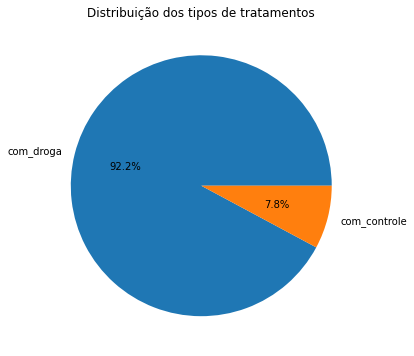

In [ ]:
#plotando gráfico de pizza para mostrar as proporções dos valores em tratamento
fig, ax = plt.subplots(figsize=(20,6))
labels = ['com_droga', 'com_controle']
ax.pie(dados['tratamento'].value_counts(normalize=True), labels=labels, autopct='%1.1f%%')
ax.set_title('Distribuição dos tipos de tratamentos')

##Observando graficamente os valores de tempo

Text(0, 0.5, 'Nº de experimentos')

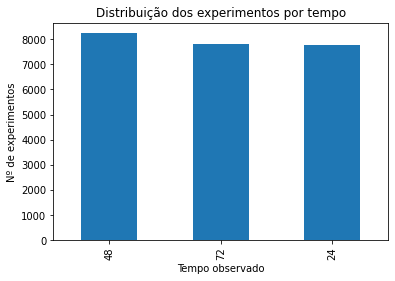

In [ ]:
barplot_time = dados['tempo'].value_counts().plot.bar()
barplot_time.set_title('Distribuição dos experimentos por tempo')
barplot_time.set_xlabel('Tempo observado')
barplot_time.set_ylabel('Nº de experimentos')

Text(0, 0.5, 'Nº de experimentos')

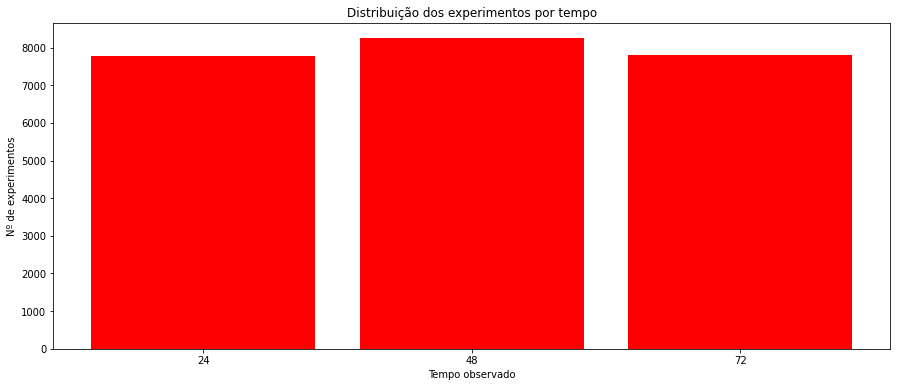

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(dados['tempo'].unique(), height=dados['tempo'].value_counts(ascending=True), width=20, color='red')
ax.set_xticks(dados['tempo'].unique())
ax.set_title('Distribuição dos experimentos por tempo')
ax.set_xlabel('Tempo observado')
ax.set_ylabel('Nº de experimentos')

Text(0, 0.5, 'Nº de experimentos')

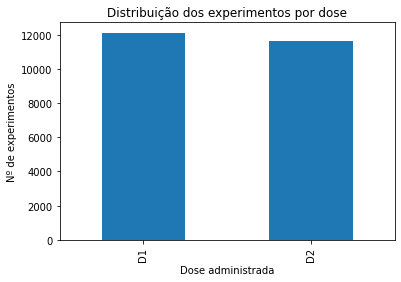

In [ ]:
barplot_dose = dados['dose'].value_counts().plot.bar()
barplot_dose.set_title('Distribuição dos experimentos por dose')
barplot_dose.set_xlabel('Dose administrada')
barplot_dose.set_ylabel('Nº de experimentos')

###Desafio 4: Quantos tipos de drogas foram investigados?

In [ ]:
dados['droga'].nunique()

3289

###Desafio 5: Procurar a documentação do query (no pandas) e resolver o desafio de criar a máscara de valores g-0 maiores que zero

In [ ]:
dados.query('g0 > 0')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.

In [ ]:
dados.query('dose == "D1"') #fazendo mais um uso do Query

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.6701,2.0780,1.3350,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23804,id_fff506720,com_droga,24,D1,74515bfd2,-1.0140,0.1709,-0.4291,1.8750,0.9859,0.3009,0.0650,-1.3920,-1.0410,1.4790,-0.4459,0.7377,-0.0037,-0.0995,-0.2393,-1.1670,-0.9359,1.1260,0.3450,-1.0780,2.7230,0.5255,0.6368,0.0000,-0.1172,0.8256,0.2120,2.1500,0.5925,-0.7637,0.1157,0.0919,-0.5855,-0.6233,-0.7982,...,-1.1130,0.6549,-1.

###Desafio 6: Renomear as colunas tirando o hífen

In [ ]:
dados.columns = dados.columns.str.replace("-","")

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Desafio 7: Fazer um resumo das descobertas

Preferi deixar as anotações ao longo das células, se você leu até aqui, provavelmente viu minhas notas!

##Observando a distribuição dos genes g0 e g1

-5.513
10.0
0.24836629293692816
-0.00885
1.9415595281112463
2.7902704903030693


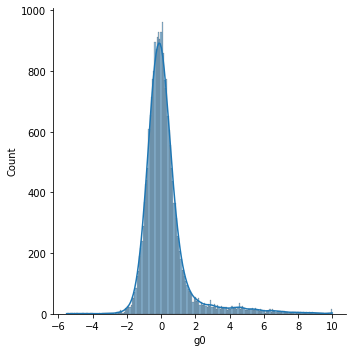

In [ ]:
#histograma da distribuição dos resultados de g0
ax = sns.displot(data=dados, x='g0', kde=True)
print(dados['g0'].min())
print(dados['g0'].max())
print(dados['g0'].mean())
print(dados['g0'].median())
print(dados['g0'].var())
print(dados['g0'].skew())

-5.737
5.039
-0.09568387083228354
-0.0466
0.6599343136855848
-0.16939839905670648


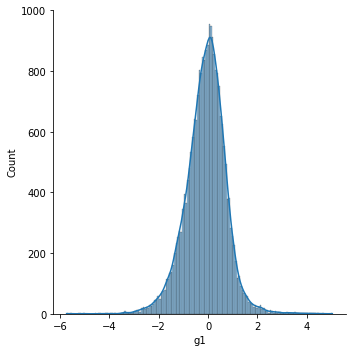

In [ ]:
sns.displot(data=dados, x='g1', kde=True)
print(dados['g1'].min())
print(dados['g1'].max())
print(dados['g1'].mean())
print(dados['g1'].median())
print(dados['g1'].var())
print(dados['g1'].skew())

###Aula 02

In [ ]:
#forma interessante de substituir nome de coluna
#através de um mapa
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

Criando um countplot com os primeiros 5 compostos mais usados

In [ ]:
comp = dados['composto'].value_counts().index[:5]

In [ ]:
#coletando as infos dos 5 compostos com o query
d_comp = dados.query('composto in @comp') #o @ serve para declarar que a váriavel foi definida pelo python e não pelo dados

###Desafio 9: Melhorar a visualização e estética dos gráficos

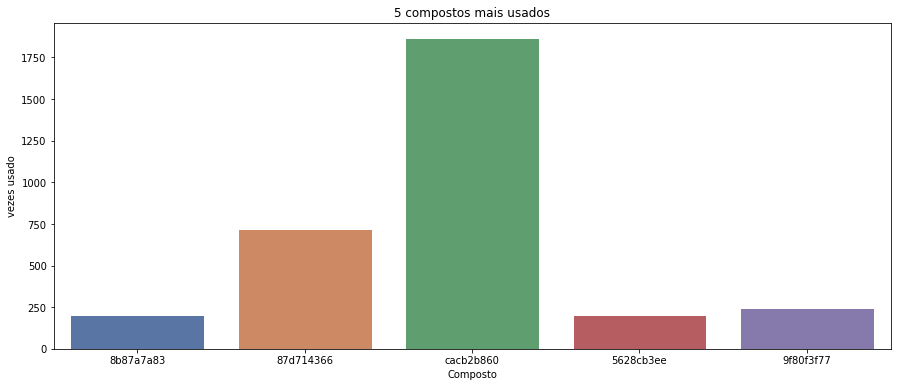

In [ ]:
#usando o Seaborn
fig, ax = plt.subplots(figsize=(15,6))
sns.set() #rodar pelo menos uma vez o .set() tras as novas configurações automáticas de estilização do Seaborn
ax = sns.countplot(data=d_comp, x='composto')
ax.set_title('5 compostos mais usados', )
ax.set_xlabel('Composto')
ax.set_ylabel('vezes usado')
plt.show() #colocar ele mesmo com o matplotlib inline some com o text que vem em cima do gráfico

In [ ]:
#loc nos genes 'g'
dados.loc[:,'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

Histograma das médias dos genes 'g'

In [ ]:
#com o .T fazemos a transposição do DataFrame
describe_g = dados.loc[:,'g0':'g771'].describe().T

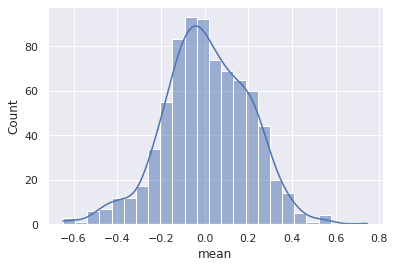

In [ ]:
#plotando o histograma das médias
hist_g = sns.histplot(describe_g, x='mean', kde=True)
plt.show()

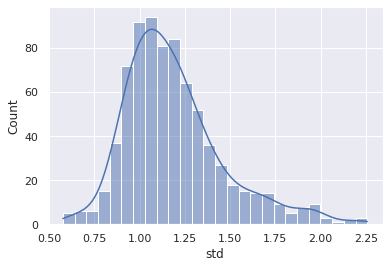

In [ ]:
#histograma dos desvios-padrão
hist_g = sns.histplot(describe_g, x='std', kde=True)
plt.show()

Observando as variáveis 'c'

In [ ]:
describe_c = dados.loc[:,'c0':'c99'].describe().T

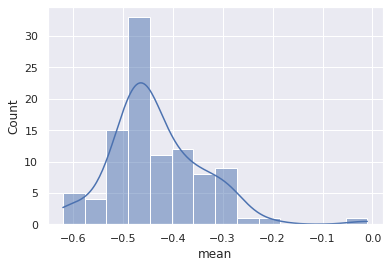

In [ ]:
#histograma das médias
sns.histplot(data=describe_c, x='mean', kde=True)
plt.show()

No Dataframe, cada 'c' respresenta linhagens de células, o pressuposto de ter vários tipos de células é para garantir a famosa independência estatística, e não gerar o viés de que o o medicamento agiu em determinado tipo, ou que foi o tipo que gerou o resultado da célula, e também garantir saber possíveis colaterais.

Os valores registrados em c são as viabilidades, ou seja, "o quanto as células sobreviveram" à exposição daqueles compostos 

###Plotando Boxplots

In [ ]:
sns.boxplot(data=dados, x='g0')

In [ ]:
#boxplot da resposta de g0 por dose administrada
plt.figure(figsize=(10,6))
sns.boxplot(data=dados, x='g0', y='dose', )

In [ ]:
#boxplot da resposta de g0 por tratamento
sns.boxplot(data=dados, x='g0', y='tratamento')

Plotando um boxplot mais bonito e mais completo

In [ ]:
fig, ax = plt.subplots(figsize=(10,9))
sns.set_style('darkgrid')
sns.set_context('talk')
ax = sns.boxplot(data=dados, x='tratamento', y='g0', hue='dose', palette='Paired')
ax.set_xlabel('Tipo de tratamento', fontdict={'fontsize':20})
ax.set_ylabel('gene g0')
ax.set_title('Quartis e mediana por tratamento e dose', fontdict={'fontsize':20, 'verticalalignment':'center'})
plt.show()

##Dia 3

Função nova: ".crosstab" que cria uma frequency table

Para filtrar mais de um dado, nas colunas ou linhas (e criar um MultiIndex) devemos inserir os **colchetes antes**(procedimento padrão no Pandas).

Podemos normalizar os valores de várias formas (ver documetação) com o **'normalize='**.

Para adicionar um valor específico que desejamos ver os dados correspondentes a ele, usar **'value='** e podemos inclusive, colocar uma função (média, mediana, std, etc.) com o **'aggfunc='**.

In [ ]:
pd.crosstab(dados['dose'], [dados['tratamento'], dados['tempo']])

tratamento com_controle           com_droga            
tempo                24   48   72        24    48    72
dose                                                   
D1                  301  343  307      3585  4011  3600
D2                  305  305  305      3581  3591  3580

In [ ]:
#outra forma de fazer
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento']) 

In [ ]:
#plotando as proporções
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True) * 100

tratamento  com_controle  com_droga
dose tempo                         
D1   24         1.263962  15.054170
     48         1.440329  16.843034
     72         1.289158  15.117158
D2   24         1.280759  15.037373
     48         1.280759  15.079365
     72         1.280759  15.033174

In [ ]:
#plotando as proporções pelo index (nesse caso será em relação as linhas)
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='mean')

###Desafio 08: Fazer uma tabela parecida com a crosstab mas utilizando o Groupby

Nota pessoal: Eu gosto muito de Groupby, ela é muito poderosa

In [ ]:
groupby = dados.groupby(by=['dose', 'tratamento','tempo']).count()

In [ ]:
groupby.iloc[:13,2:3]

g0
dose tratamento   tempo      
D1   com_controle 24      301
                  48      343
                  72      307
     com_droga    24     3585
                  48     4011
                  72     3600
D2   com_controle 24      305
                  48      305
                  72      305
     com_droga    24     3581
                  48     3591
                  72     3580

In [ ]:
groupby.iloc[:13,2:3].T

dose                 D1                      ...           D2                      
tratamento com_controle           com_droga  ... com_controle com_droga            
tempo                24   48   72        24  ...           72        24    48    72
g0                  301  343  307      3585  ...          305      3581  3591  3580

[1 rows x 12 columns]

###Desafio 9: Normalizar o crosstab pela coluna

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

###Desafio 10: Quais outros agregadores existem?

Média

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Mediana

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

Standard Deviation a.k.a Desvio-padrão

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

Variância

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='var')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

###Desafio 11: Explorar o Melt

Esse método pode ser aplicado tanto em pd (pandas) quanto diretamente no Dataframe

In [ ]:
pd.melt(dados, id_vars=['dose','tratamento', 'tempo'], value_vars=['g0'])

,dose,tratamento,tempo,variable,value
0,D1,com_droga,24,g0,1.0620
1,D1,com_droga,72,g0,0.0743
2,D1,com_droga,48,g0,0.6280
3,D1,com_droga,48,g0,-0.5138
4,D2,com_droga,72,g0,-0.3254
...,...,...,...,...,...
23809,D2,com_droga,24,g0,0.1394
23810,D2,com_droga,24,g0,-1.3260
23811,D2,com_controle,48,g0,0.3942
23812,D1,com_droga,24,g0,0.6660


In [ ]:
dados.melt(id_vars=['dose','tratamento','tempo'], value_vars=['g0'])

,dose,tratamento,tempo,variable,value
0,D1,com_droga,24,g0,1.0620
1,D1,com_droga,72,g0,0.0743
2,D1,com_droga,48,g0,0.6280
3,D1,com_droga,48,g0,-0.5138
4,D2,com_droga,72,g0,-0.3254
...,...,...,...,...,...
23809,D2,com_droga,24,g0,0.1394
23810,D2,com_droga,24,g0,-1.3260
23811,D2,com_controle,48,g0,0.3942
23812,D1,com_droga,24,g0,0.6660


In [ ]:
dados.melt(id_vars=['dose','tratamento','tempo'], value_vars=['g0'])[:5]
#podemos aplicar o index como sempre para dar uma filtrada

,dose,tratamento,tempo,variable,value
0,D1,com_droga,24,g0,1.0620
1,D1,com_droga,72,g0,0.0743
2,D1,com_droga,48,g0,0.6280
3,D1,com_droga,48,g0,-0.5138
4,D2,com_droga,72,g0,-0.3254


In [ ]:
dados.melt(id_vars=['dose','tratamento','tempo'], value_vars=['g0'], value_name='respostas do gene 0').mean()
#observando a média do gene 0 pela dose, tratamento e tempo

tempo                  48.020156
respostas do gene 0     0.248366
dtype: float64

###Explorando as correlações e variações de g0 e g1

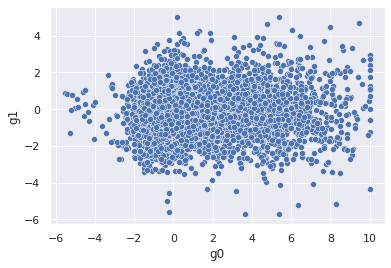

In [ ]:
#usando a dispersão
sns.scatterplot(data=dados, x='g0', y='g1')

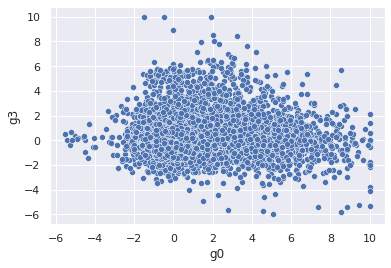

In [ ]:
sns.scatterplot(data=dados, x='g0', y='g3', )

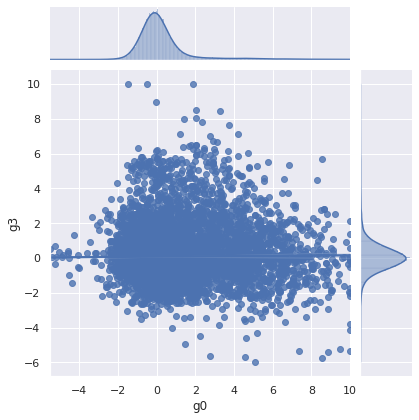

In [ ]:
#o jointplot mostra a distruibuição junto com a dispersão
sns.jointplot(data=dados, x='g0', y='g3', kind='reg')

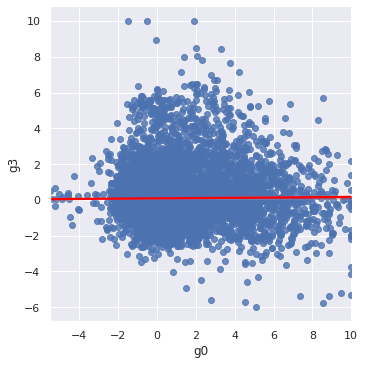

In [ ]:
#outra forma de ver a linha de distribuição é com o lmplot
sns.lmplot(data=dados, x='g0', y='g3', line_kws={'color':'red'})

In [ ]:
sns.lmplot(data=dados, x='g0', y='g3', line_kws={'color':'red'}, hue='dose', col='tratamento', row='tempo')

Observando as correlações

O Próprio Pandas pode nos mostrar as correlações

In [ ]:
#.corr()
dados.loc[:,'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

No geral, utilizamos um gráfico 'heatmap' para ver as correlações.

Aqui, usaremos um ctrl+c ctrl+v da matriz diagonal de correlação

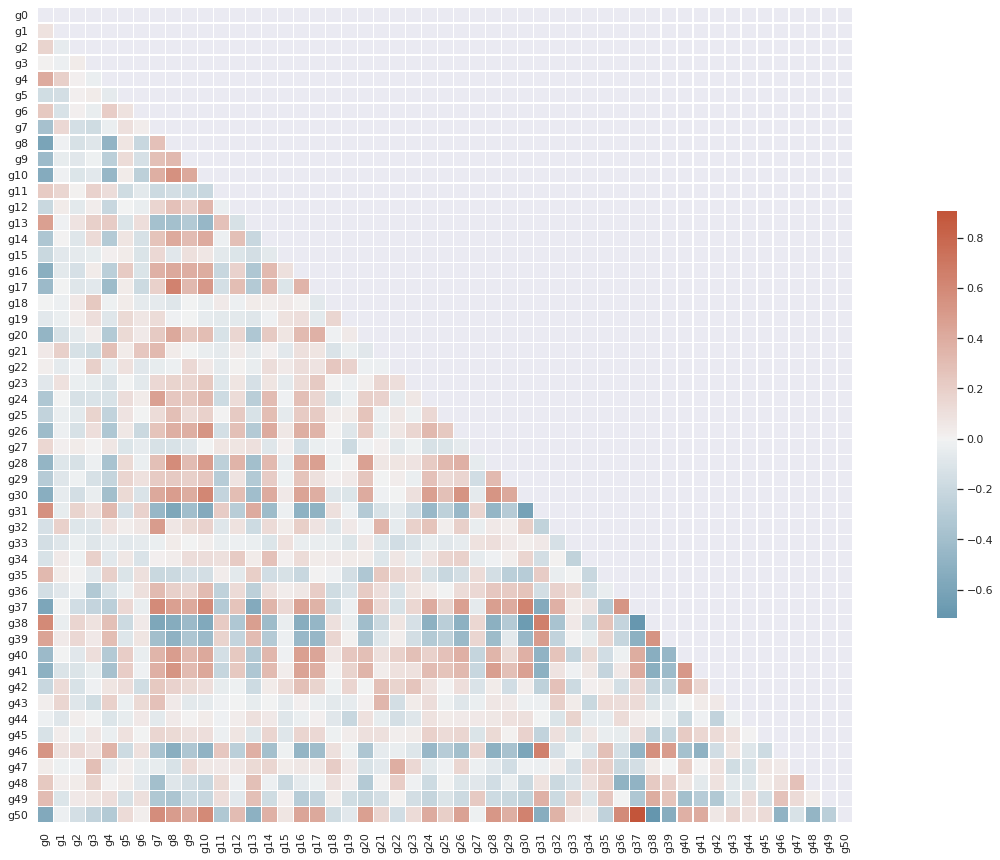

In [ ]:
corr = dados.loc[:,'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

VELHO LEMBRETE: **Correlação não é causalidade!**

Correlações de C

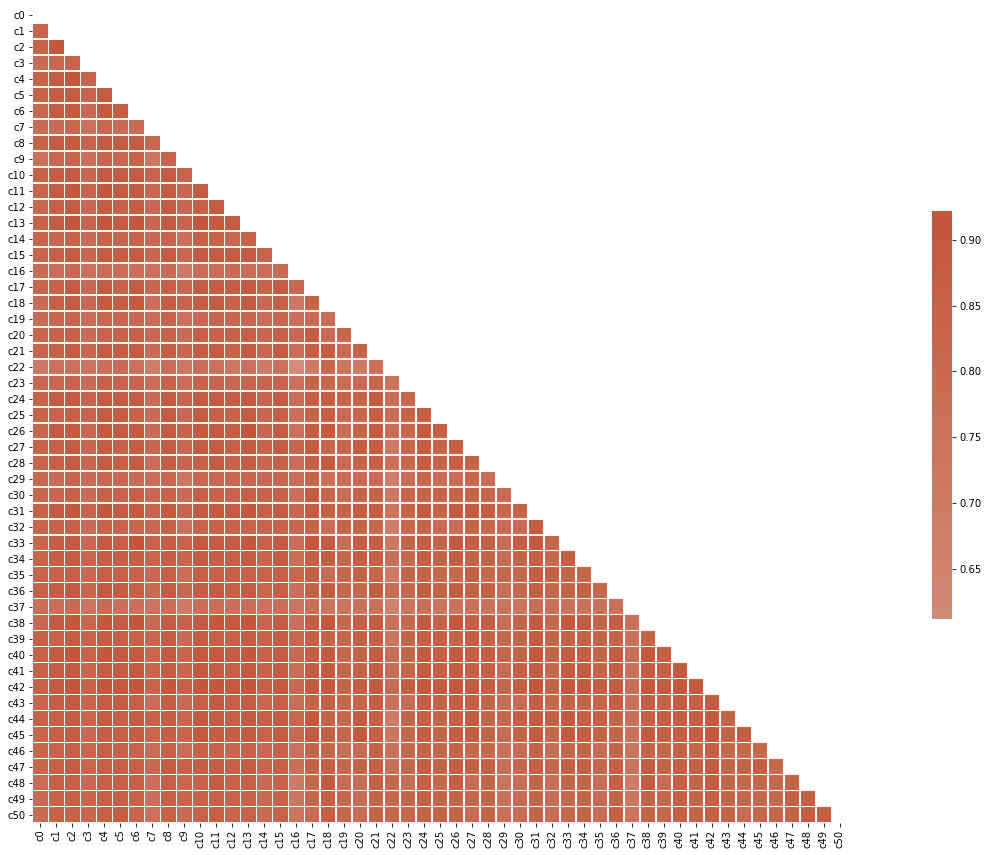

In [ ]:
corr_c = dados.loc[:,'c0':'c50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_c, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Desafio 12: Explorar a correlação entre expressões gênicas g e os tipos célulares c